In [1]:
import pandas as pd

In [2]:

reviews = pd.read_csv("..\data\wine-reviews\winemag-data-130k-v2.csv", index_col=0)
pd.set_option("display.max_rows", 5)

In [5]:
reviews.groupby("points").points.count()

points
80     397
81     692
      ... 
99      33
100     19
Name: points, Length: 21, dtype: int64

<AxesSubplot:xlabel='points'>

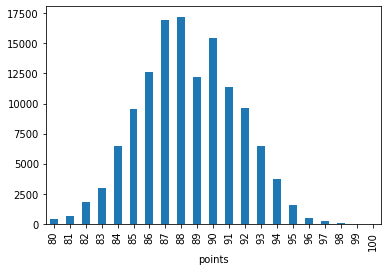

In [6]:
reviews.groupby("points").points.count().plot(kind="bar")

<AxesSubplot:xlabel='points'>

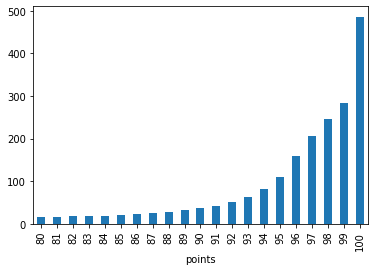

In [9]:
reviews.groupby("points").price.mean().plot(kind="bar")

In [10]:
reviews.groupby("winery").apply(lambda x : x.title.iloc[0])

winery
1+1=3                          1+1=3 NV Rosé Sparkling (Cava)
10 Knots                 10 Knots 2010 Viognier (Paso Robles)
                                  ...                        
àMaurice    àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                         Štoka 2009 Izbrani Teran (Kras)
Length: 16757, dtype: object

In [14]:
reviews.groupby(["country", "province"]).apply(lambda x : x.loc[x.points.idxmax()])

country  \
country   province                      
Argentina Mendoza Province  Argentina   
          Other             Argentina   
...                               ...   
Uruguay   San Jose            Uruguay   
          Uruguay             Uruguay   

                                                                  description  \
country   province                                                              
Argentina Mendoza Province  If the color doesn't tell the full story, the ...   
          Other             Take note, this could be the best wine Colomé ...   
...                                                                       ...   
Uruguay   San Jose          Baked, sweet, heavy aromas turn earthy with ti...   
          Uruguay           Cherry and berry aromas are ripe, healthy and ...   

                                          designation  points  price  \
country   province                                                     
Argentina Mendoza Province           Nicasia Vineyard      97  120.0   
          Other                               Reserva      95   90.0   
...                                               ...     ...    ...   
Uruguay   San Jose           El Preciado Gran Reserva      87   50.0   
          Uruguay           Blend 002 Limited Edition      91   22.0   

                                    province region_1 region_2  \
country   province                                               
Argentina Mendoza Province  Mendoza Province  Mendoza      NaN   
          Other                        Other    Salta      NaN   
...                                      ...      ...      ...   
Uruguay   San Jose                  San Jose      NaN      NaN   
          Uruguay                    Uruguay      NaN      NaN   

                                  taster_name taster_twitter_handle  \
country   province                                                    
Argentina Mendoza Province  Michael Schachner           @wineschach   
          Other             Michael Schachner           @wineschach   
...                                       ...                   ...   
Uruguay   San Jose          Michael Schachner           @wineschach   
          Uruguay           Michael Schachner           @wineschach   

                                                                        title  \
country   province                                                              
Argentina Mendoza Province  Bodega Catena Zapata 2006 Nicasia Vineyard Mal...   
          Other                            Colomé 2010 Reserva Malbec (Salta)   
...                                                                       ...   
Uruguay   San Jose          Castillo Viejo 2005 El Preciado Gran Reserva R...   
          Uruguay           Narbona NV Blend 002 Limited Edition Tannat-Ca...   

                                          variety                winery  
country   province                                                       
Argentina Mendoza Province                 Malbec  Bodega Catena Zapata  
          Other                            Malbec                Colomé  
...                                           ...                   ...  
Uruguay   San Jose                      Red Blend        Castillo Viejo  
          Uruguay           Tannat-Cabernet Franc               Narbona  

[425 rows x 13 columns]

In [17]:
reviews.groupby("country").price.agg([len , min, max, "mean", "std"])

,len,min,max,mean,std
country,,,,,
Argentina,3800,4.0,230.0,24.510117,23.430122
Armenia,2,14.0,15.0,14.500000,0.707107
...,...,...,...,...,...
Ukraine,14,6.0,13.0,9.214286,2.190138
Uruguay,109,10.0,130.0,26.403670,18.483786


In [18]:
country_reviewed = reviews.groupby(["country", "province"]).price.agg(len)
country_reviewed

country    province        
Argentina  Mendoza Province    3264
           Other                536
                               ... 
Uruguay    San Jose               3
           Uruguay               24
Name: price, Length: 425, dtype: int64

MultiIndex : https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html

In [20]:
type(country_reviewed.index)

pandas.core.indexes.multi.MultiIndex

In [23]:
country_reviewed = country_reviewed.reset_index()
country_reviewed

,country,province,price
0,Argentina,Mendoza Province,3264
1,Argentina,Other,536
...,...,...,...
423,Uruguay,San Jose,3
424,Uruguay,Uruguay,24


In [24]:
country_reviewed.sort_values(by="price", ascending=False)

,country,province,price
392,US,California,36247
415,US,Washington,8639
...,...,...,...
63,Chile,Coelemu,1
149,Greece,Beotia,1


In [ ]:
country_reviewed